In [18]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import transforms

plt.rcParams["figure.figsize"] = (9,7)
sns.set()
sns.set_context("paper")
sns.set_style("whitegrid")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [19]:
infile = "perfChanges.pkl"
df_results = pd.read_pickle(infile)
df_accuracy = pd.read_pickle("accuracy.pkl")

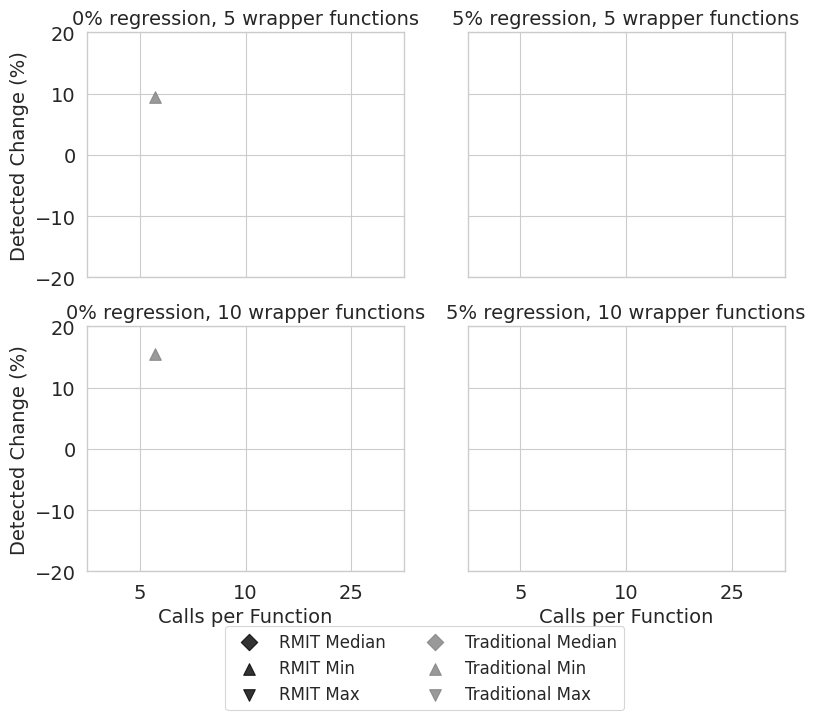

In [20]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True,)
platformText="google"
color1 = "black"
color2 = "gray"
alpha = 0.8
msize=70

axs[0,0].set_ylim(0,100)
axs[0,0].set_xlim(-0.5,2.5)

dx, dy = 0.15, 0.
offset = transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)



subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 0)
                             & (df_results["wrapperCount"] == 5)
                             & (df_results["method"] == "faasterBench")
                             & (df_results["iterations"] == 3)]
shiftLeft = axs[0,0].transData - offset
axs[0, 0].scatter(subset["callsPerFunction"], subset["change"], c=color1, marker="D", alpha=alpha, s=msize, transform=shiftLeft)
axs[0, 0].scatter(subset["callsPerFunction"], subset["min"], c=color1, marker="^", alpha=alpha, s=msize, transform=shiftLeft)
axs[0, 0].scatter(subset["callsPerFunction"], subset["max"], c=color1, marker="v", alpha=alpha, s=msize, transform=shiftLeft)

subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 0)
                             & (df_results["wrapperCount"] == 5)
                             & (df_results["method"] == "traditional")
                             & (df_results["iterations"] == 3)]

shiftRight = axs[0,0].transData + offset
axs[0, 0].scatter(subset["callsPerFunction"], subset["change"], c=color2, marker="D", alpha=alpha, s=msize, transform=shiftRight)
axs[0, 0].scatter(subset["callsPerFunction"], subset["min"], c=color2, marker="^", alpha=alpha, s=msize, transform=shiftRight)
axs[0, 0].scatter(subset["callsPerFunction"], subset["max"], c=color2, marker="v", alpha=alpha, s=msize, transform=shiftRight)

axs[0, 0].set_title('0% regression, 5 wrapper functions', fontdict={'size': 14 })


subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 5)
                             & (df_results["wrapperCount"] == 5)
                             & (df_results["method"] == "faasterBench")
                             & (df_results["iterations"] == 3)]
shiftLeft = axs[0,1].transData - offset
axs[0, 1].scatter(subset["callsPerFunction"], subset["change"], c=color1, marker="D", alpha=alpha, s=msize, transform=shiftLeft)
axs[0, 1].scatter(subset["callsPerFunction"], subset["min"], c=color1, marker="^", alpha=alpha, s=msize, transform=shiftLeft)
axs[0, 1].scatter(subset["callsPerFunction"], subset["max"], c=color1, marker="v", alpha=alpha, s=msize, transform=shiftLeft)

subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 5)
                             & (df_results["wrapperCount"] == 5)
                             & (df_results["method"] == "traditional")
                             & (df_results["iterations"] == 3)]
shiftRight = axs[0,1].transData + offset
axs[0, 1].scatter(subset["callsPerFunction"], subset["change"], c=color2, marker="D", alpha=alpha, s=msize, transform=shiftRight)
axs[0, 1].scatter(subset["callsPerFunction"], subset["min"], c=color2, marker="^", alpha=alpha, s=msize, transform=shiftRight)
axs[0, 1].scatter(subset["callsPerFunction"], subset["max"], c=color2, marker="v", alpha=alpha, s=msize, transform=shiftRight)

axs[0, 1].set_title('5% regression, 5 wrapper functions', fontdict={'size': 14 })


subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 0)
                             & (df_results["wrapperCount"] == 10)
                             & (df_results["method"] == "faasterBench")
                             & (df_results["iterations"] == 3)]
shiftLeft = axs[1,0].transData - offset
axs[1, 0].scatter(subset["callsPerFunction"], subset["change"], c=color1, marker="D", alpha=alpha, s=msize, transform=shiftLeft)
axs[1, 0].scatter(subset["callsPerFunction"], subset["min"], c=color1, marker="^", alpha=alpha, s=msize, transform=shiftLeft)
axs[1, 0].scatter(subset["callsPerFunction"], subset["max"], c=color1, marker="v", alpha=alpha, s=msize, transform=shiftLeft)

subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 0)
                             & (df_results["wrapperCount"] == 10)
                             & (df_results["method"] == "traditional")
                             & (df_results["iterations"] == 3)]
shiftRight = axs[1,0].transData + offset
axs[1, 0].scatter(subset["callsPerFunction"], subset["change"], c=color2, marker="D", alpha=alpha, s=msize, transform=shiftRight)
axs[1, 0].scatter(subset["callsPerFunction"], subset["min"], c=color2, marker="^", alpha=alpha, s=msize, transform=shiftRight)
axs[1, 0].scatter(subset["callsPerFunction"], subset["max"], c=color2, marker="v", alpha=alpha, s=msize, transform=shiftRight)

axs[1, 0].set_title('0% regression, 10 wrapper functions', fontdict={'size': 14 })

subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 5)
                             & (df_results["wrapperCount"] ==10)
                             & (df_results["method"] == "faasterBench")
                             & (df_results["iterations"] == 3)]
shiftLeft = axs[1,1].transData - offset
axs[1, 1].scatter(subset["callsPerFunction"], subset["change"], c=color1, marker="D", alpha=alpha, s=msize, transform=shiftLeft)
axs[1, 1].scatter(subset["callsPerFunction"], subset["min"], c=color1, marker="^", alpha=alpha, s=msize, transform=shiftLeft)
axs[1, 1].scatter(subset["callsPerFunction"], subset["max"], c=color1, marker="v", alpha=alpha, s=msize, transform=shiftLeft)

subset = df_results.loc[(df_results["platform"] == platformText)
                             & (df_results["regression"] == 5)
                             & (df_results["wrapperCount"] == 10)
                             & (df_results["method"] == "traditional")
                             & (df_results["iterations"] == 3)]
shiftRight = axs[1,1].transData + offset
axs[1, 1].scatter(subset["callsPerFunction"], subset["change"], c=color2, marker="D", alpha=alpha, s=msize, transform=shiftRight)
axs[1, 1].scatter(subset["callsPerFunction"], subset["min"], c=color2, marker="^", alpha=alpha, s=msize, transform=shiftRight)
axs[1, 1].scatter(subset["callsPerFunction"], subset["max"], c=color2, marker="v", alpha=alpha, s=msize, transform=shiftRight)

axs[1, 1].set_title('5% regression, 10 wrapper functions', fontdict={'size': 14 })

first = True
for ax in axs.flat:
    ax.set_xlabel('Calls per Function', fontdict={'size': 14 })
    ax.set_ylabel('Detected Change (%)', fontdict={'size': 14 })
    ax.tick_params(labelsize=14)
    ax.label_outer()

fig.legend(['RMIT Median', 'RMIT Min', 'RMIT Max', 'Traditional Median', 'Traditional Min','Traditional Max'],
           ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12)

plt.savefig("results_" + platformText + ".pdf",bbox_inches='tight')

<AxesSubplot:xlabel='measurements', ylabel='deviation'>

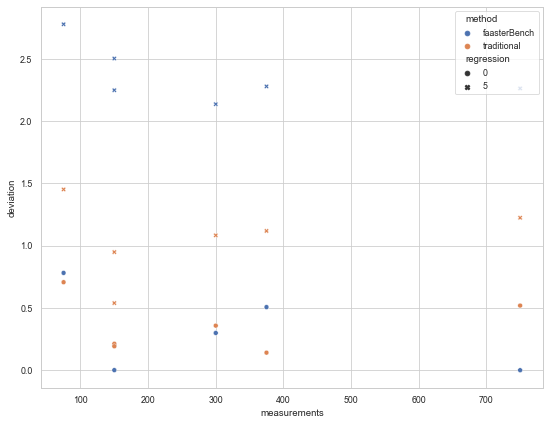

In [14]:
sns.scatterplot(data=df_accuracy, x="measurements", y="deviation", hue="method", style="regression")

<AxesSubplot:xlabel='measurements', ylabel='CIWidth'>

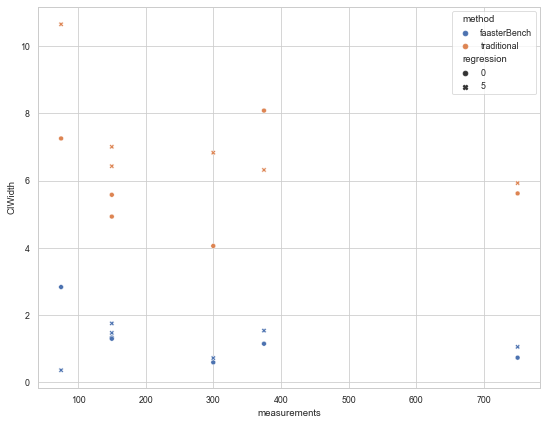

In [15]:
sns.scatterplot(data=df_accuracy, x="measurements", y="CIWidth", hue="method", style="regression")